## Iñigo Martiarena Conde

### Explicacion del descenso de graciente paso a paso

#### Librerias necesarias para la demostracion

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [94]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [95]:
data = pd.read_csv("4_1_data.csv") # Importamos el dataset
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [96]:
data.info() # vista preliminar de las caracteristicas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [97]:
scores = data[['score-1','score-2']].values # hacemos una lista con las puntuaciones
results = data['label'].values # otra con los resultados

In [98]:
aprobar = (y == 1).reshape(100,1) # asignamos el valor  1= aprobar
suspender = (y == 0). reshape(100,1) # asignamos el valor 0= suspender 

In [99]:
scores[aprobar[:,0],0] # vista preliminar

array([60.18259939, 79.03273605, 61.10666454, 75.02474557, 76.0987867 ,
       84.43281996, 82.30705337, 69.36458876, 53.97105215, 69.07014406,
       70.66150955, 76.97878373, 89.67677575, 77.92409145, 62.27101367,
       80.19018075, 61.37928945, 85.40451939, 52.04540477, 64.17698887,
       83.90239366, 94.44336777, 77.19303493, 97.77159928, 62.0730638 ,
       91.5649745 , 79.94481794, 99.27252693, 90.54671411, 97.64563396,
       74.24869137, 71.79646206, 75.39561147, 40.45755098, 80.27957401,
       66.74671857, 64.03932042, 72.34649423, 60.45788574, 58.84095622,
       99.8278578 , 47.26426911, 50.4581598 , 88.91389642, 94.83450672,
       67.31925747, 57.23870632, 80.366756  , 68.46852179, 75.47770201,
       78.63542435, 94.09433113, 90.44855097, 74.49269242, 89.84580671,
       83.48916274, 42.26170081, 99.31500881, 55.34001756, 74.775893  ])

In [100]:
scores[aprobar[:,0],1] # vista preliminar

array([86.3085521 , 75.34437644, 96.51142588, 46.55401354, 87.42056972,
       43.53339331, 76.4819633 , 97.71869196, 89.20735014, 52.74046973,
       92.92713789, 47.57596365, 65.79936593, 68.97235999, 69.95445795,
       44.82162893, 72.80788731, 57.05198398, 69.43286012, 80.90806059,
       56.30804622, 65.56892161, 70.4582    , 86.72782233, 96.76882412,
       88.69629255, 74.16311935, 60.999031  , 43.39060181, 68.86157272,
       69.82457123, 78.45356225, 85.75993667, 97.53518549, 92.11606081,
       60.99139403, 78.03168802, 96.22759297, 73.0949981 , 75.85844831,
       72.36925193, 88.475865  , 75.80985953, 69.8037889 , 45.6943068 ,
       66.58935318, 59.51428198, 90.9601479 , 85.5943071 , 90.424539  ,
       96.64742717, 77.15910509, 87.50879176, 84.84513685, 45.35828361,
       48.3802858 , 87.10385094, 68.77540947, 64.93193801, 89.5298129 ])

In [101]:
scores[suspender[:,0],0] # vista preliminar

array([34.62365962, 30.28671077, 35.84740877, 45.08327748, 95.86155507,
       75.01365839, 39.53833914, 67.94685548, 67.37202755, 50.53478829,
       34.21206098, 93.1143888 , 61.83020602, 38.7858038 , 52.10797973,
       40.23689374, 54.63510555, 33.91550011, 74.78925296, 34.18364003,
       51.54772027, 82.36875376, 51.04775177, 62.22267576, 34.52451385,
       50.28649612, 49.58667722, 32.57720017, 35.28611282, 56.2538175 ,
       30.05882245, 44.66826172, 66.56089447, 49.07256322, 32.72283304,
       60.45555629, 82.22666158, 42.07545454, 52.34800399, 55.48216114])

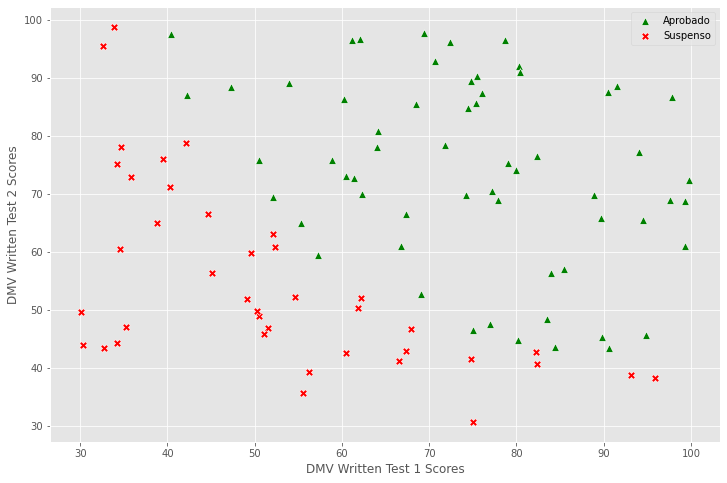

In [102]:
# Graficamos el resultado con las variables independientes
ax = sns.scatterplot(x = scores[aprobar[:,0],0],
                    y = scores[aprobar[:,0],1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[suspender[:,0],0],
                    y = scores[suspender[:,0],1],
                     marker = "X",
                     color = "red",
                     s = 60)
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Aprobado", "Suspenso"])
plt.show();                   

In [103]:
def logistic_function(x):    # creamos la funcion S. 
    return 1/ (1 + np.exp(-x)) # comparamos la regresion logistica y la regresion lineal
logistic_function(0)

0.5

In [104]:
def compute_cost(theta, x, y):
    m = len(y) # indentifica el numero de dimensiones que vamos a utilizar
    y_pred = logistic_function(np.dot(x , theta)) 
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) # Loss error = ½ (predicted value – actual value)2
    cost = -1 / m * sum(error) # función coste
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y)) # funcion gradiente
    return cost[0] , gradient

# es igual al producto de la traspuesta de m y el error dividio por el número de samples
# conseguimos la regresion logistica de la funcion coste

In [105]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores # standardization 

rows = scores.shape[0] # el número total de samples
cols = scores.shape[1] # el número total de feautures

x = np.append(np.ones((rows, 1)), scores, axis=1)
y = results.reshape(rows, 1)

# inserto una columna de 1s como primera entrada en el nuevo vector, se trata de un pequeño truco que nos permite introducir
# el "bias" como un parámetro dentro del peso de la matriz, en vez de como una variable separada

theta_init = np.zeros((cols + 1, 1)) # esto es el procesos de initalization, que me indica donde empieza la fuunción

# con la funcion de coste vemos la distacia a la que estan los puntos actuales de nuestra regresion lineals 
# ademas, evaluamos el performance del modelo en el training dataset
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)  
print("Gradient at initialization:", gradient) # gradiciente inicial 

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [106]:
def gradient_descent(x, y, theta, alpha, iterations):  # descenso de gradiente esta en funcion de x, y, theta, alpha, iteraciones
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y) # a menor gradiente, menor el coste 
        theta -= (alpha * gradient) # Alpha multiplica el gradiente en funcion de theta 
        costs.append(cost)
    return theta, costs

In [107]:
# utilizamos una tasa de aprendizaje (alfa) = 0.2 y 200 iteraciones
theta, costs = gradient_descent(X, y, theta_init, 1, 200) 

In [108]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.2048938203603661


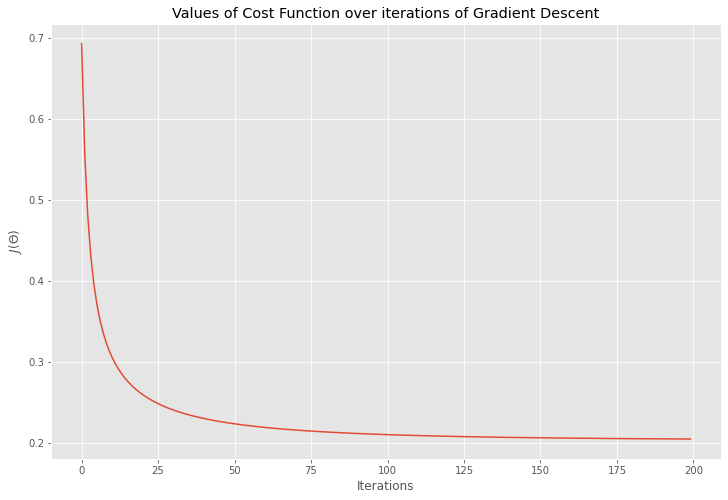

In [109]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

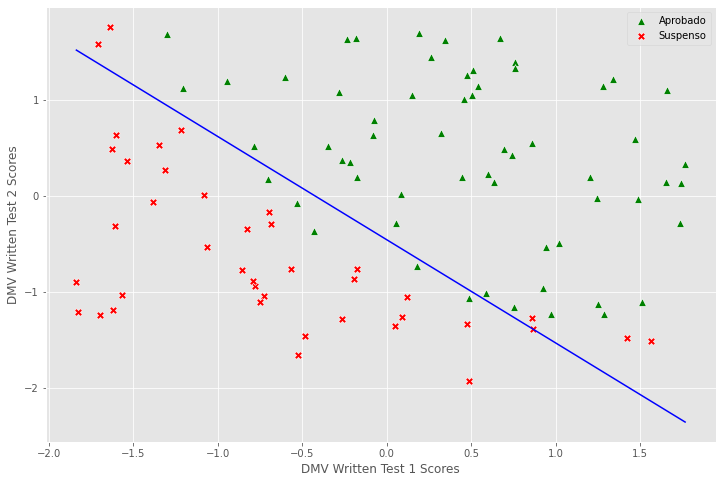

In [110]:
ax = sns.scatterplot(x = scores[aprobar[:,0],0],
                    y = scores[aprobar[:,0],1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[suspender[:,0],0],
                    y = scores[suspender[:,0],1],
                     marker = "X",
                     color = "red",
                     s = 60)
ax.legend(["Aprobado", "Suspenso"])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]
ax.legend(["Aprobado", "Suspenso"])
sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show()

In [111]:
test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.71 probability of passing.


In [112]:
# computa el porcentaje de correcta clasificación de nuestro training set.
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %


## Bibliografia

https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb
https://www.ellaberintodefalken.com/2019/03/regresion-lineal-descenso-de-gradiente.html